**Họ và tên: Võ Hoàng Thông </br>
MSSV: 18521462 </br>
Lab 6**

**Step 1: Define the problem**

In [ ]:
import pandas as pd
import io
from io import BytesIO
from urllib.request import Request, urlopen
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
url = Request(link, headers={'User-Agent': 'Mozilla/5.0'})
df = pd.read_csv(BytesIO(urlopen(url).read()))
df.columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.sample(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
43,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
14,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
102,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,184.6,66.5,55.1,3060,ohcv,six,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
111,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.70,3.52,21.0,95,4150,28,33,16900
35,0,78,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,58.3,2024,ohc,four,92,1bbl,2.92,3.41,9.2,76,6000,30,34,7295
119,1,154,plymouth,gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,50.6,1967,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,11845
60,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595
192,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,183.1,66.9,55.1,2563,ohc,four,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
25,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609


In [ ]:
print("Kích thước của DataFrame: ", df.shape) 

Kích thước của DataFrame:  (204, 26)


In [ ]:
import numpy as np 
df = df.replace(['??','?','.','','_','NA','NULL','null','not','Not', 'Na'], np.nan)
print("Số lượng missing trong dataframe là ", df.isnull().sum().sum()) 
print("Số lượng missing ở các thuộc tính: ")
df.isna().sum()

Số lượng missing trong dataframe là  58
Số lượng missing ở các thuộc tính: 


symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Vấn đề nhận thấy ở bộ dữ liệu này là: </br>
1/ Một số thuộc tính bị thiếu giá trị: normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm, price. </br>
2/ Thuộc tính bị thiếu giá trị có cả ở 2 loại là biến liên tục và biến phân loại. </br>
**Kết luận:** Để bộ dữ liệu có thể phân tích và phát triển mô hình ta cần phải điền dữ liệu thiếu vào các ô này.

**Step 2: Data Cleansing & Feature Engineering**

**Filling continuous variables**

In [ ]:
from fancyimpute import KNN
df['normalized-losses'] = KNN(5).fit_transform(df['normalized-losses'].to_numpy().reshape(-1,1))
df['bore'] = KNN(5).fit_transform(df['bore'].to_numpy().reshape(-1,1))
from sklearn.impute import KNNImputer
df['stroke'] = KNNImputer(n_neighbors=3).fit_transform(df['stroke'].to_numpy().reshape(-1,1))
df['horsepower'] = KNNImputer(n_neighbors=3).fit_transform(df['horsepower'].to_numpy().reshape(-1,1))
df['price'] = KNNImputer(n_neighbors=3).fit_transform(df['price'].to_numpy().reshape(-1,1))
df['peak-rpm'] = KNNImputer(n_neighbors=3).fit_transform(df['peak-rpm'].to_numpy().reshape(-1,1))

Imputing row 1/204 with 1 missing, elapsed time: 0.012
Imputing row 101/204 with 0 missing, elapsed time: 0.012
Imputing row 201/204 with 0 missing, elapsed time: 0.013
[KNN] Warning: 40/204 still missing after imputation, replacing with 0
Imputing row 1/204 with 0 missing, elapsed time: 0.015
Imputing row 101/204 with 0 missing, elapsed time: 0.016
Imputing row 201/204 with 0 missing, elapsed time: 0.017
[KNN] Warning: 4/204 still missing after imputation, replacing with 0


**Filling category variables**

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
imputer = IterativeImputer(ExtraTreesRegressor())
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

In [ ]:
df['num-of-doors'] = encode(df['num-of-doors'])
df['num-of-doors'] = pd.DataFrame(np.round(imputer.fit_transform(df['num-of-doors'].values.reshape(-1,1))))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**Kiểm tra missing values sau khi điền các giá trị thiếu trong dataframe**

In [ ]:
print("Số lượng missing trong dataframe là ", df.isna().sum().sum()) 

Số lượng missing trong dataframe là  0


**Feature Engineering**

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

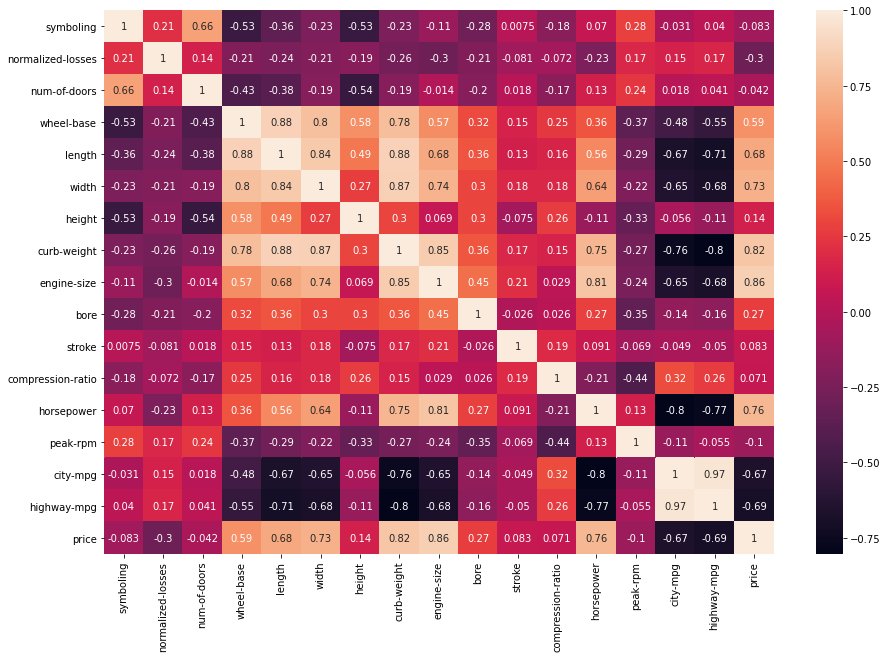

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(15,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

Đối với biến mục tiêu "price", ta chọn những thuộc tính (continuous variable) sau có sự ảnh hưởng đáng kể dựa trên ma trận tương quan gồm các thuộc tính wheel-base, length, width, curb-weight, engine-size, horsepower, city-mpg, highway-mpg.

In [ ]:
categorical_features = ['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [ ]:
categorical_df = df[['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']]
from sklearn.preprocessing import LabelEncoder
categorical_df = categorical_df.apply(LabelEncoder().fit_transform)

In [ ]:
X = categorical_df.values
Y  = df['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state =0)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regressor = DecisionTreeRegressor(random_state=0)
for i in range(X.shape[1]):
    regressor.fit(X_train[:, i].reshape(-1,1), Y_train)
    y_pred = regressor.predict(X_test[:, i].reshape(-1,1))
    print("R2 score = ", r2_score(Y_test, y_pred), categorical_features[i])

R2 score =  0.6664607028380745 make
R2 score =  0.016528686879338395 fuel-type
R2 score =  0.04952214981951153 aspiration
R2 score =  0.00255511024255739 num-of-doors
R2 score =  0.02727081215616034 body-style
R2 score =  0.3567075967804344 drive-wheels
R2 score =  0.1418303247613304 engine-location
R2 score =  0.14096416412612067 engine-type
R2 score =  0.6407531081896433 num-of-cylinders
R2 score =  0.3287504399299449 fuel-system


Đối với biến categorical, ta chọn biến make và num-of-cylinders là những biến có score > 0.5, có ảnh hưởng tương đối cao đối với biến kết quả price.

**Step 3: Model selection & training** &
**Step 4: Evaluate & test the model results & performance**

In [ ]:
link = 'https://raw.githubusercontent.com/datasethub/ds105/master/Model-Evaluation-and-Refinement.csv'
url = Request(link, headers={'User-Agent': 'Mozilla/5.0'})
df = pd.read_csv(BytesIO(urlopen(url).read()))
df.sample(5)

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,symboling,normalized-losses,price
137,2145,108,0.826526,0.908333,82.0,32,37,97.2,3.62,0,102,7126.0
94,2037,97,0.817876,0.886111,69.0,31,37,94.5,3.15,1,103,7999.0
169,2326,122,0.843825,0.923611,92.0,29,34,102.4,3.31,-1,65,8948.0
69,3685,234,0.866410,0.979167,155.0,16,18,96.6,3.46,3,142,35056.0
187,2661,136,0.865930,0.929167,110.0,19,24,100.4,3.19,0,122,13295.0


Tạo ra tổ hợp 2^n phép thử để thử các thuộc tính có trong dataframe.

In [ ]:
import itertools
n = len(df.columns) - 1
combinations = list(itertools.product([True, False], repeat=n))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.model_selection import cross_val_score
ss = StandardScaler()
rs = RobustScaler()
qt = QuantileTransformer(output_distribution='normal',n_quantiles=891)
yj = PowerTransformer(method = 'yeo-johnson')
bc = PowerTransformer(method = 'box-cox')
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def create_model(model_name, preprocessing_name, df):
    df_result = pd.DataFrame(columns=['Model','Feature_details', 'RMSE', 'R2_train', 'R2_test', '4-Fold Validation', '5-Fold Validation', 'Note'])
    total_choosed_features = []
    degrees = []
    for i in range(2, 11):
        degrees.append(i)
    total_combinations = int(len(combinations) / 2)
    # total_combinations = len(combinations)
    for i in range(0, total_combinations):
        choosed_features = []
        for j in range(0, len(combinations[i])):
            if combinations[i][j] == True:
                choosed_features.append(j)
        total_choosed_features.append(choosed_features)
    for combination_feature in total_choosed_features:
        if model_name == 'linear_regression':
            columns_name = df.iloc[:, combination_feature].columns.tolist() 
            X = df.iloc[:, combination_feature] 
            y = df['price']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
            reg = LinearRegression().fit(X_train, y_train)
            R2_train = reg.score(X_train, y_train)
            R2_test = reg.score(X_test, y_test)
            yhat = reg.predict(X_test)
            RMSE = sqrt(mean_squared_error(y_test, yhat))
            regfull = LinearRegression().fit(X, y)
            four_fold_validation = cross_val_score(regfull, X, y, cv = 4)
            five_fold_validation = cross_val_score(regfull, X, y, cv = 5)
            result_four_fold_validation = "%0.2f (+/- %0.2f)" % (four_fold_validation.mean(), four_fold_validation.std() * 2)
            result_five_fold_validation = "%0.2f (+/- %0.2f)" % (five_fold_validation.mean(), five_fold_validation.std() * 2)
            df_result = df_result.append({'Model' : model_name, 'Feature_details' : columns_name, 'RMSE' : RMSE, 'R2_train' : R2_train,\
                                          'R2_test' : R2_test, '4-Fold Validation' : result_four_fold_validation,\
                                          '5-Fold Validation' : result_five_fold_validation, 'Note' : ''}, ignore_index=True)
        elif model_name == 'polynomial regression':
            X = df.iloc[:, combination_feature] 
            y = df['price']
            columns_name = df.iloc[:, combination_feature].columns.tolist() 
            for degree in degrees:
                new_model_name = model_name + ' with degree ' + str(degree)
                pr = PolynomialFeatures(degree = degree, include_bias = False)
                X_poly = pr.fit_transform(X)
                X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)
                poly_degree_reg = LinearRegression().fit(X_train, y_train)
                
                R2_train = poly_degree_reg.score(X_train, y_train)
                R2_test = poly_degree_reg.score(X_test, y_test)
                yhat = poly_degree_reg.predict(X_test)
                RMSE = sqrt(mean_squared_error(y_test, yhat))
                regfull = LinearRegression().fit(X_poly, y)
                four_fold_validation = cross_val_score(regfull, X_poly, y, cv = 4)
                five_fold_validation = cross_val_score(regfull, X_poly, y, cv = 5)
                result_four_fold_validation = "%0.2f (+/- %0.2f)" % (four_fold_validation.mean(), four_fold_validation.std() * 2)
                result_five_fold_validation = "%0.2f (+/- %0.2f)" % (five_fold_validation.mean(), five_fold_validation.std() * 2)
                df_result = df_result.append({'Model' : new_model_name, 'Feature_details' : columns_name, 'RMSE' : RMSE, 'R2_train' : R2_train,\
                                            'R2_test' : R2_test, '4-Fold Validation' : result_four_fold_validation,\
                                            '5-Fold Validation' : result_five_fold_validation, 'Note' : ''}, ignore_index=True)
                # print(df_result)
                
    return df_result

In [ ]:
df_linear_reg = create_model('linear_regression', '', df)

In [ ]:
df_linear_reg.sort_values(ascending=False, by=['R2_test', '4-Fold Validation', '5-Fold Validation']).head(5)

,Model,Feature_details,RMSE,R2_train,R2_test,4-Fold Validation,5-Fold Validation,Note
319,linear_regression,"[curb-weight, engine-size, width, horsepower]",4524.910733,0.809164,0.761068,0.67 (+/- 0.30),0.57 (+/- 0.51),
287,linear_regression,"[curb-weight, engine-size, width, horsepower, ...",4526.641605,0.809263,0.760886,0.67 (+/- 0.31),0.57 (+/- 0.51),
303,linear_regression,"[curb-weight, engine-size, width, horsepower, ...",4527.367831,0.809172,0.760809,0.67 (+/- 0.31),0.56 (+/- 0.51),
317,linear_regression,"[curb-weight, engine-size, width, horsepower, ...",4536.250599,0.809249,0.759869,0.67 (+/- 0.30),0.57 (+/- 0.50),
285,linear_regression,"[curb-weight, engine-size, width, horsepower, ...",4536.296010,0.809327,0.759865,0.67 (+/- 0.30),0.57 (+/- 0.51),


In [ ]:
df_linear_reg.shape

(1024, 8)

In [ ]:
df_poly_reg = create_model('polynomial regression', '', df)

In [ ]:
df_poly_reg.shape

(9216, 8)

In [ ]:
df_poly_reg.sort_values(ascending=False, by=['R2_test', '4-Fold Validation', '5-Fold Validation']).head(5)

,Model,Feature_details,RMSE,R2_train,R2_test,4-Fold Validation,5-Fold Validation,Note
7192,polynomial regression with degree 3,"[curb-weight, width, horsepower, city-mpg]",3136.419666,0.890085,0.885205,-0.47 (+/- 2.73),-0.40 (+/- 1.39),
7480,polynomial regression with degree 3,"[curb-weight, width, horsepower]",3301.615727,0.873786,0.872794,-0.11 (+/- 1.79),0.40 (+/- 0.43),
7606,polynomial regression with degree 3,"[curb-weight, width, city-mpg, highway-mpg, sy...",3368.335174,0.914707,0.867601,-0.47 (+/- 2.43),-0.76 (+/- 1.29),
9101,polynomial regression with degree 4,"[curb-weight, wheel-base, bore]",3369.165118,0.872549,0.867536,-0.69 (+/- 1.68),-1.07 (+/- 2.03),
2385,polynomial regression with degree 2,"[curb-weight, engine-size, width, horsepower, ...",3401.305879,0.919397,0.864997,0.42 (+/- 0.64),0.33 (+/- 0.77),


Đối với mô hình Linear Regression:
- Ta chọn 5 mô hình đầu tiên được sắp xếp giảm dần theo các giá trị R2 test, 4 fold validation, 5 fold validation. Là những mô hình tốt nhất trong khoảng 2^11 mô hình được thử. </br>
- Các mô hình Linear Regression khá phù hợp, không có sự chênh lệch kết quả quá nhiều ở các tập train và tập test. 

Đối với mô hình Polynomial Regression:
- Ta cũng chọn 5 mô hình đầu tiên theo tiêu chí giảm dần theo các giá trị R2 test, 4 fold validation, 5 fold, validation. Là những mô hình tốt nhất trong khoảng 2^11 * 9 (bậc) mô hình được thử.
- Các mô hình này được thử với 9 bậc từ bậc 2 -> bậc 10.
- Các mô hình Polynomial Regression được kiểm chứng chéo cho kết quả không tốt. 


Nhận xét:
+ Tổng cộng có 10 mô hình tốt nhất theo mô hình hồi quy và hồi quy mũ.
+ Chi tiết 10 mô hình là 2 bảng phía trên.